In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import kendalltau
from scipy.stats import pearsonr

In [3]:
df = pd.read_csv('/content/churn_clean.csv')

In [4]:
df.head()

,index,customer_id,churn,tenure,preferred_login_device,city_tier,warehouse_to_home,preferred_payment_mode,gender,hour_spend_on_app,...,prefered_order_cat,satisfaction_score,marital_status,number_of_address,complain,order_amount_hike_from_last_year,coupon_used,order_count,day_since_last_order,cashback_amount
0,0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.000000,...,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,1,50002,1,9.0,Phone,1,8.0,UPI,Male,3.000000,...,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,2,50003,1,9.0,Phone,1,30.0,Debit Card,Male,2.000000,...,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.000000,...,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,4,50005,1,0.0,Phone,1,12.0,CC,Male,2.931535,...,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


# EDA

'tenure', 'prefered_order_cat','complain', 'day_since_last_order','cashback_amount', 'number_of_device_registered','churn'

- tau-correlation tenure with 'churn' : -0.3204831454880175, p-value: 1.3093077457025187e-181
- tau-correlation prefered_order_cat with 'churn' : 0.12451075997099315, p-value: 3.4445675332889434e-25
- tau-correlation complain with 'churn' : 0.25018825469703126, p-value: 1.30925009951443e-78
- tau-correlation day_since_last_order with 'churn' : -0.15499885203756195, p-value: 1.0703943082974461e-41
- tau-correlation cashback_amount with 'churn' : -0.1409049129604515, p-value: 2.518104481408721e-38
- tau-correlation number_of_device_registered with 'churn' : 0.09329876527502229, p-value: 3.053915686208165e-14

In [5]:
df['churn'].value_counts()

0    4682
1     948
Name: churn, dtype: int64

##1. Churn based on Preferred Order Category & Complain

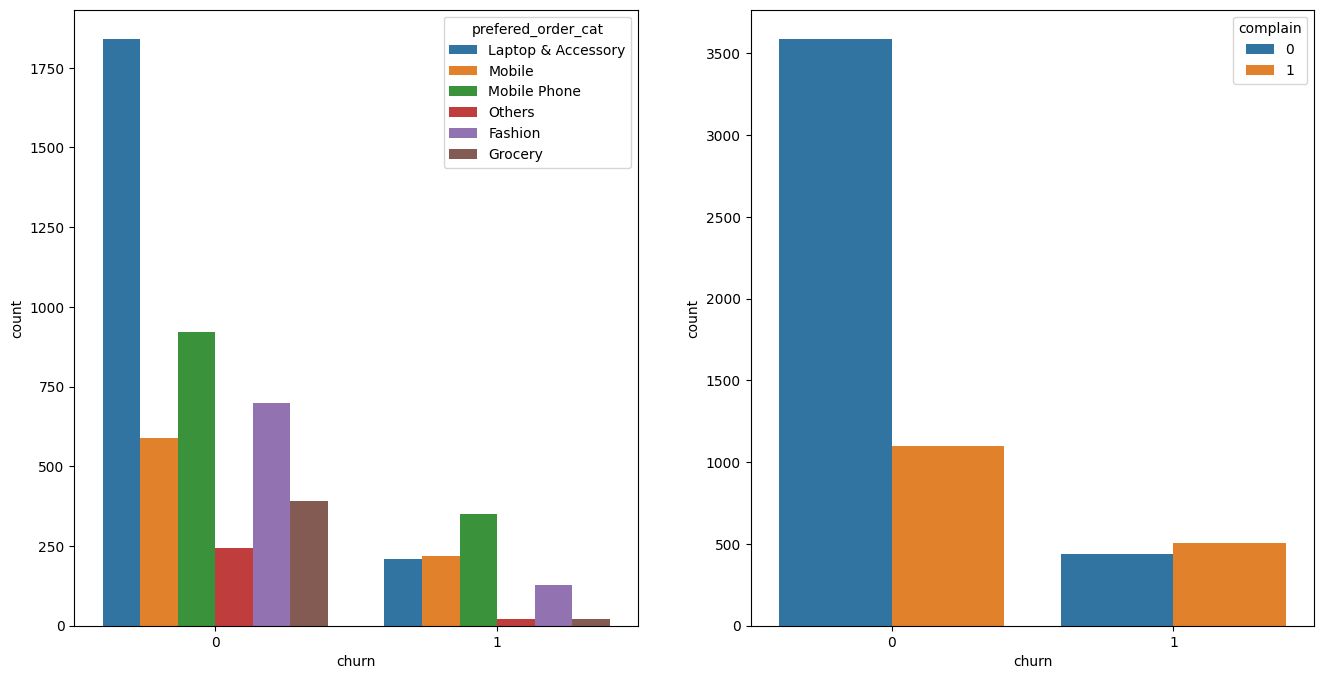

In [14]:
# membuat bar plot pada beberapa variabel kategory
fig, axs = plt.subplots(1, 2, figsize=(16, 8))
sns.countplot(x='churn', hue='prefered_order_cat', data=df, ax=axs[0])
sns.countplot(x='churn', hue='complain', data=df, ax=axs[1])
# sns.countplot(x='churn', hue='tenure', data=df, ax=axs[2])
plt.show()

**Preferred Order Category**

Berdasarkan data dari customer yang *tidak churn*, *Laptop & Accessory* merupakan kategori yang secara signifikan lebih populer dibandingkan yang lainnya (38.4%) diikuti dengan *Mobile Phone*. Sementara itu, *Mobile Phone* juga menjadi kategori yang paling banyak datanya di antara customer yang *churn*.

**Complain**

Jika melihat dataset customer churn berdasarkan complain, sedikit sekali customer *tidak churn* yang mengajukan *complain* (22.4%). Bertolak belakang dengan customer *churn*, 53.7% customer mengajukan complain yang lebih banyak dari customer yang *tidak complain*.

##2. Pie Chart

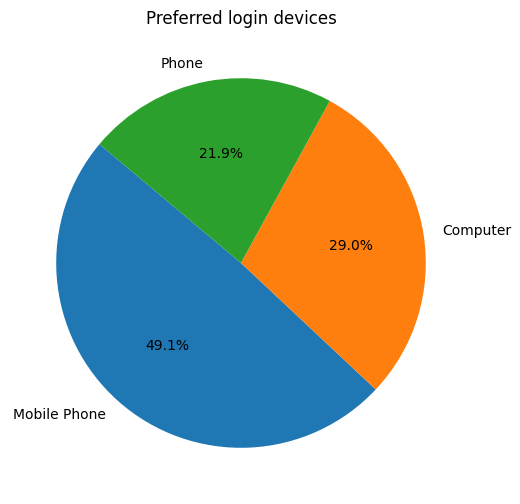

In [7]:
login_device = df['preferred_login_device'].value_counts()

plt.figure(figsize=(30, 6))
plt.pie(login_device, labels=login_device.index, autopct='%1.1f%%', startangle=140)
plt.title('Preferred login devices')
plt.show()

Selain menjadi kategori yang cukup populer untuk dibelanjakan, *Mobile Phone* dan *Computer* (yang juga bisa melalui laptop) juga merupakan login device yang digunakan untuk berbelanja e-commerce, di mana *Mobile Phone* dan *Phone* mewakili sekitar 70% preferred login device dari dataset.

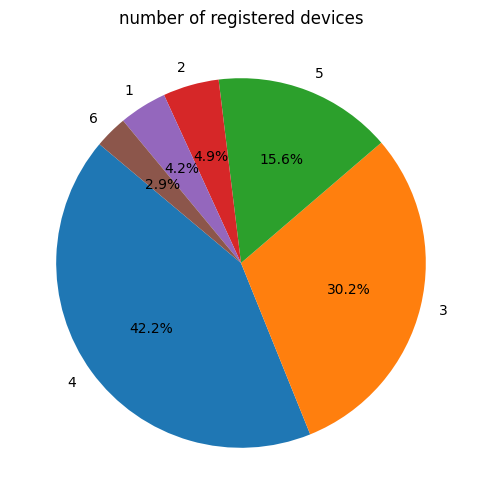

In [8]:
device_registered = df['number_of_device_registered'].value_counts()

plt.figure(figsize=(30, 6))
plt.pie(device_registered, labels=device_registered.index, autopct='%1.1f%%', startangle=140)
plt.title('number of registered devices')
plt.show()

Untuk melakukan pembelanjaan pada e-commerce, tidak sedikit customer yang meregistrasikan lebih dari 1 perangkat. Dari dataset yang ada, customer paling banyak meregistrasikan 4 (42.2%) dan 3 (30.2%) devices. Mengacu pada pie chart sebelumnya, multiple devices yang diregistrasi dapat berupa memakai lebih dari 1 *Mobile Phone* atau *Computer*.

##3. Tenure & Day Since Last Order

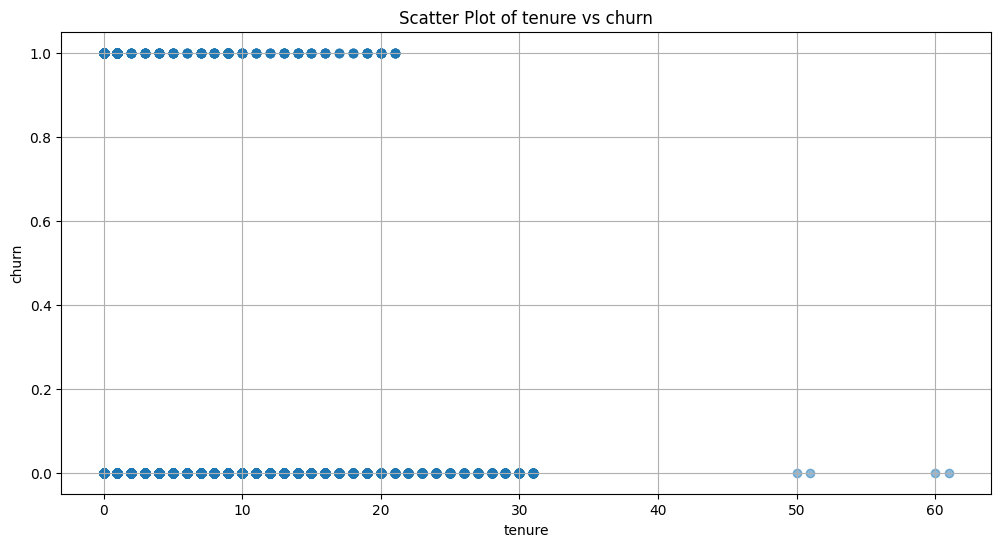

In [23]:
plt.figure(figsize=(12, 6))
plt.scatter(df['tenure'], df['churn'], alpha=0.5)
plt.title('Scatter Plot of tenure vs churn')
plt.xlabel('tenure')
plt.ylabel('churn')
plt.grid(True)
plt.show()

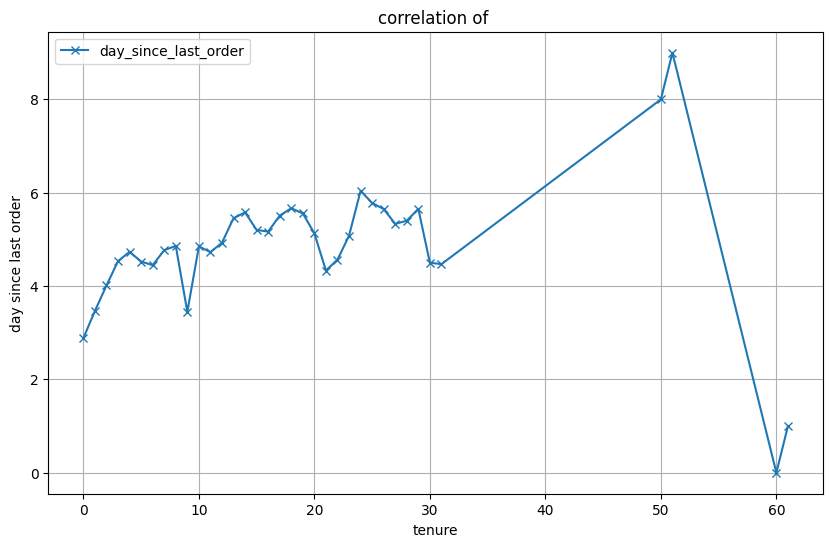

In [9]:
grouped = df.groupby('tenure')[['day_since_last_order']].mean()
grouped.plot(kind='line', marker='x', figsize=(10, 6))

plt.xlabel('tenure')
plt.ylabel('day since last order')
plt.title('correlation of ')

plt.grid(True)
plt.show()

Mengacu pada tau-correlation, ditemukan bahwa terdapat korelasi negatif antara *tenure* dan *churn*, ini berarti semakin tinggi nilai tenure (jumlah hari yang dihabiskan) pada situs e-commerce, semakin rendah kemungkinan customer untuk *churn*.

**churn & tenure**

Ditemukan bahwa tenure customer yang *tidak churn* memiliki kesamaan dengan customer *churn* sampai dengan nilai 21. Ini menunjukkan bahwa hari ke 21 merupakan penentuan apakah customer akan tetap menggunakan layanan e-commerce yang sama atau beralih ke platform yang lain

**tenure & day since last order**

Terdapat korelasi positif antara *tenure* dan *day since last order*. Mengacu pada findings sebelumnya, setelah hari ke 21 semakin tinggi juga nilai *day since last order*. Bagian tersebut mewakili customer yang *tidak churn* dan masih menggunakan aplikasi sehingga masih menempatkan order pada layanan e-commerce.

##4. Cashback Amount

<Figure size 3000x600 with 0 Axes>

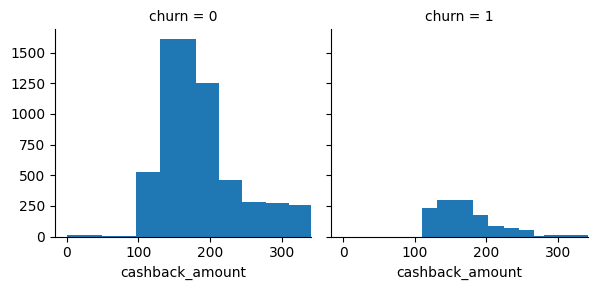

In [10]:
plt.figure(figsize=(30, 6))
grid = sns.FacetGrid(df, col='churn')
grid.map(plt.hist, 'cashback_amount', width=50)
grid.add_legend()

Pada customer yang *tidak churn*, distribusi nominal cashback jauh lebih tinggi dibandingkan customer yang *churn*. Ini menunjukkan bahwa customer yang meninggalkan layanan e-commerce dan beralih ke yang lain tidak mendapatkan nominal cashback yang diinginkan.